In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(data)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [6]:
def splitSequence(seq, n_steps):

    #Declare X and y as empty list
    X = []
    y = []

    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps

        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break

        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]

        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)

    return X,y

In [7]:
n_steps = 7
X, y = splitSequence(data, n_steps)

In [8]:
print(X)


[[ 10  20  30  40  50  60  70]
 [ 20  30  40  50  60  70  80]
 [ 30  40  50  60  70  80  90]
 [ 40  50  60  70  80  90 100]
 [ 50  60  70  80  90 100 110]
 [ 60  70  80  90 100 110 120]
 [ 70  80  90 100 110 120 130]
 [ 80  90 100 110 120 130 140]
 [ 90 100 110 120 130 140 150]
 [100 110 120 130 140 150 160]
 [110 120 130 140 150 160 170]
 [120 130 140 150 160 170 180]
 [130 140 150 160 170 180 190]]


In [9]:
print(y)


[ 80  90 100 110 120 130 140 150 160 170 180 190 200]


In [10]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[[10]
  [20]
  [30]
  [40]
  [50]
  [60]
  [70]]

 [[20]
  [30]
  [40]
  [50]
  [60]
  [70]
  [80]]]


# Creating the model:


In [11]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError())


In [15]:
# Training the model

print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test), verbose=1
)

Fit model on training data
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 22075.9023 - val_loss: 17352.7637
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 22071.3984 - val_loss: 17347.5762
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 22066.5137 - val_loss: 17341.8730
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 22061.1328 - val_loss: 17335.5137
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 22055.1133 - val_loss: 17328.3340
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 22048.2832 - val_loss: 17320.1250
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 22040.4258 - val_loss: 17310.6465
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 22031.2852 - val_loss: 17299.5957
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 22020.5195 - val_loss: 17286.6035
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 22007.6934 - val_loss: 17271.1953
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - 

In [16]:
# Predicting on data:

test_data = np.array([90, 100, 110, 120, 130, 140, 150])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[ 90],
        [100],
        [110],
        [120],
        [130],
        [140],
        [150]]])

In [17]:
predictNextNumber = model.predict(test_data, verbose=1)
print(predictNextNumber)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
[[160.43225]]


In [21]:
model.save("NumberSequence.keras")


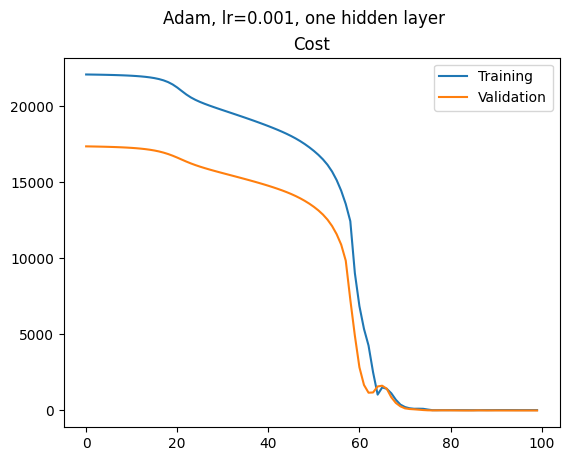

In [19]:
# Building graphs for the model:

fig = plt.figure()
fig.suptitle("Adam, lr=0.001, one hidden layer")

ax = fig.add_subplot(1,1, 1)
ax.set_title('Cost')
ax.plot(history.history['loss'], label='Training')
ax.plot(history.history['val_loss'], label='Validation')
ax.legend()

fig.show()